**Chapter 1 – The Machine Learning landscape**

_This is the code used to generate some of the figures in chapter 1._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message=".*internal gels.*")

# Code example 1-1

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [2]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [3]:
datapath = os.path.join("datasets", "lifesat", "")

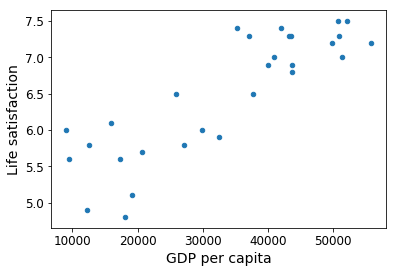

[[5.96242338]]


/usr/local/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [4]:
# Code example
import pandas as pd
import sklearn.linear_model

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

# Note: you can ignore the rest of this notebook, it just generates many of the figures in chapter 1.

# Load and prepare Life satisfaction data

If you want, you can get fresh data from the OECD's website.
Download the CSV from http://stats.oecd.org/index.aspx?DataSetCode=BLI
and save it to `datasets/lifesat/`.

In [5]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2017.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head(2)

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,1.1,80.0,13.20,72.0,63.6,1.0,33417.0,57462.0,20.0,...,52063.0,94.0,2.3,85.0,2.7,502.0,14.35,91.0,92.0,21.2
Austria,16.0,1.0,85.0,6.78,72.0,80.7,0.4,32544.0,59574.0,21.0,...,48295.0,92.0,1.6,70.0,1.3,492.0,14.55,75.0,93.0,17.1


In [6]:
oecd_bli["Life satisfaction"].head()

Country
Australia    7.3
Austria      7.0
Belgium      6.9
Brazil       6.6
Canada       7.3
Name: Life satisfaction, dtype: float64

# Load and prepare GDP per capita data

Just like above, you can update the GDP per capita data if you want. Just download data from http://goo.gl/j1MSKe (=> imf.org) and save it to `datasets/lifesat/`.

In [7]:
gdp_per_capita = pd.read_csv(datapath+"gdp_2016.csv", thousands=',', delimiter=',',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
#drop rows that don't contain a number for the GDP figure
gdp_per_capita = gdp_per_capita.dropna(subset=['GDP per capita'])
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(200)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.380,2010.0
Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.140,2014.0
Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.320,2014.0
Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.300,2011.0
Argentina,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13588.850,2013.0
Armenia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3534.860,2014.0
Australia,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",50961.870,2014.0
Austria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",43724.030,2015.0


In [8]:
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
full_country_stats

,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net financial wealth,Housing expenditure,...,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
South Africa,22.0,37.0,43.0,18.68,43.0,36.1,10.0,10872.0,17042.0,18.0,...,14.73,73.0,69.0,15.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",5694.57,2014.0
Brazil,10.0,6.7,49.0,7.15,64.0,37.3,27.6,12227.0,7102.0,20.0,...,14.45,79.0,72.0,15.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",8670.00,2014.0
Mexico,16.0,4.2,37.0,29.48,61.0,45.9,17.9,13891.0,4750.0,21.0,...,12.74,63.0,67.0,14.8,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9009.28,2015.0
Russia,15.0,13.8,95.0,0.16,70.0,52.2,11.3,16657.0,2260.0,19.0,...,14.90,65.0,54.0,16.1,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9054.91,2015.0
Turkey,20.0,6.5,39.0,33.77,51.0,60.6,1.7,17067.0,4429.0,20.0,...,12.59,85.0,63.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",9437.37,2013.0
Hungary,19.0,4.3,83.0,3.05,67.0,50.7,1.2,16821.0,23289.0,18.0,...,15.06,62.0,76.0,16.6,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12239.89,2015.0
Poland,22.0,2.7,91.0,6.68,65.0,66.3,0.8,18906.0,14997.0,23.0,...,14.42,55.0,80.0,17.7,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",12495.33,2014.0
Chile,16.0,9.4,65.0,10.06,62.0,51.1,4.5,16588.0,21409.0,18.0,...,14.90,49.0,69.0,17.3,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13340.91,2014.0
Latvia,11.0,12.9,89.0,2.09,69.0,60.7,6.6,15269.0,17105.0,23.0,...,13.83,59.0,77.0,17.9,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",13618.57,2015.0


In [9]:
full_country_stats[["GDP per capita", 'Life satisfaction']].loc["United States"]

GDP per capita       55805.2
Life satisfaction        6.9
Name: United States, dtype: float64

In [10]:
full_country_stats.index

Index(['South Africa', 'Brazil', 'Mexico', 'Russia', 'Turkey', 'Hungary',
       'Poland', 'Chile', 'Latvia', 'Slovak Republic', 'Czech Republic',
       'Estonia', 'Greece', 'Portugal', 'Slovenia', 'Spain', 'Korea', 'Italy',
       'Japan', 'Israel', 'New Zealand', 'France', 'Belgium', 'Germany',
       'Finland', 'Canada', 'Netherlands', 'Austria', 'United Kingdom',
       'Sweden', 'Iceland', 'Australia', 'Ireland', 'Denmark', 'United States',
       'Norway', 'Switzerland', 'Luxembourg'],
      dtype='object', name='Country')

In [11]:
remove_countries = [
    "Brazil",
    "Mexico",
    "Chile",
    "Czech Republic",
    "Norway",
    "Switzerland",
    "Luxembourg",
]


In [12]:
indices=np.arange(full_country_stats.shape[0])
remove_indices = indices[np.isin(full_country_stats.index,remove_countries)]
keep_indices = list(set(indices) - set(remove_indices))

In [13]:
sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

In [14]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8670.00,6.6
Mexico,9009.28,6.6
Chile,13340.91,6.7
Czech Republic,17256.92,6.6
Norway,74822.11,7.5
Switzerland,80675.31,7.5
Luxembourg,101994.09,6.9


Saving figure money_happy_scatterplot


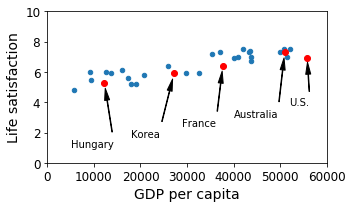

In [15]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
save_fig('money_happy_scatterplot')
plt.show()

In [16]:
sample_data.to_csv(os.path.join("datasets", "lifesat", "lifesat.csv"))

In [17]:
sample_data.loc[list(position_text.keys())]

,GDP per capita,Life satisfaction
Country,,
Hungary,12239.89,5.3
Korea,27195.20,5.9
France,37675.01,6.4
Australia,50961.87,7.3
United States,55805.20,6.9


Saving figure tweaking_model_params_plot


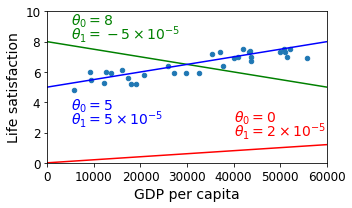

In [18]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, 2*X/100000, "r")
plt.text(40000, 2.7, r"$\theta_0 = 0$", fontsize=14, color="r")
plt.text(40000, 1.8, r"$\theta_1 = 2 \times 10^{-5}$", fontsize=14, color="r")
plt.plot(X, 8 - 5*X/100000, "g")
plt.text(5000, 9.1, r"$\theta_0 = 8$", fontsize=14, color="g")
plt.text(5000, 8.2, r"$\theta_1 = -5 \times 10^{-5}$", fontsize=14, color="g")
plt.plot(X, 5 + 5*X/100000, "b")
plt.text(5000, 3.5, r"$\theta_0 = 5$", fontsize=14, color="b")
plt.text(5000, 2.6, r"$\theta_1 = 5 \times 10^{-5}$", fontsize=14, color="b")
save_fig('tweaking_model_params_plot')
plt.show()

In [19]:
Xsample = np.c_[sample_data["GDP per capita"]]
print(sample_data["GDP per capita"])
print(Xsample)

Country
South Africa        5694.57
Russia              9054.91
Turkey              9437.37
Hungary            12239.89
Poland             12495.33
Latvia             13618.57
Slovak Republic    15991.74
Estonia            17288.08
Greece             18064.29
Portugal           19121.59
Slovenia           20732.48
Spain              25864.72
Korea              27195.20
Italy              29866.58
Japan              32485.55
Israel             35343.34
New Zealand        37044.89
France             37675.01
Belgium            40106.63
Germany            40996.51
Finland            41973.99
Canada             43331.96
Netherlands        43603.12
Austria            43724.03
United Kingdom     43770.69
Sweden             49866.27
Iceland            50854.58
Australia          50961.87
Ireland            51350.74
Denmark            52114.17
United States      55805.20
Name: GDP per capita, dtype: float64
[[ 5694.57]
 [ 9054.91]
 [ 9437.37]
 [12239.89]
 [12495.33]
 [13618.57]
 [15991.74]
 [1

In [21]:
lin1 = sklearn.linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
t0, t1 = lin1.intercept_[0], lin1.coef_[0][0]
t0, t1

(4.965657584765086, 4.633575541720297e-05)

Saving figure best_fit_model_plot


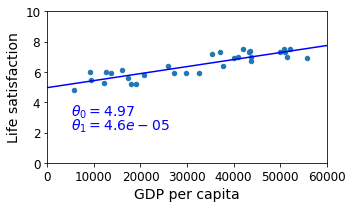

In [22]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.text(5000, 3.1, r"$\theta_0 = {:1.2f}$".format(t0), fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = {:1.2g}$".format(t1), fontsize=14, color="b")
save_fig('best_fit_model_plot')
plt.show()


In [33]:
cyprus_gdp_per_capita = gdp_per_capita.loc["Cyprus"]["GDP per capita"]
cyprusGDP=cyprus_gdp_per_capita
print(cyprusGDP)
cyprus_predicted_life_satisfaction = lin1.predict(cyprus_gdp_per_capita)[0][0]
cyprus_predicted_life_satisfaction

22587.49


6.012265996893604

Saving figure cyprus_prediction_plot


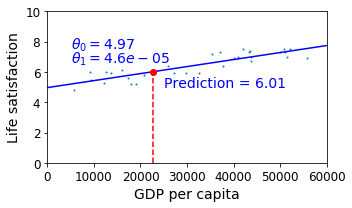

In [34]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3), s=1)
X=np.linspace(0, 60000, 1000)
plt.plot(X, t0 + t1*X, "b")
plt.axis([0, 60000, 0, 10])
plt.text(5000, 7.5, r"$\theta_0 = {:1.2f}$".format(t0), fontsize=14, color="b")
plt.text(5000, 6.6, r"$\theta_1 = {:1.2g}$".format(t1), fontsize=14, color="b")
plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita], [0, cyprus_predicted_life_satisfaction], "r--")
plt.text(25000, 5.0, r"Prediction = {:1.2f}".format(cyprus_predicted_life_satisfaction), fontsize=14, color="b")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")
save_fig('cyprus_prediction_plot')
plt.show()

In [35]:
sample_data[9:12]

,GDP per capita,Life satisfaction
Country,,
Portugal,19121.59,5.2
Slovenia,20732.48,5.8
Spain,25864.72,6.4


In [36]:
sum(sample_data['Life satisfaction'].values[9:12])/3

5.8

In [37]:
backup = oecd_bli, gdp_per_capita

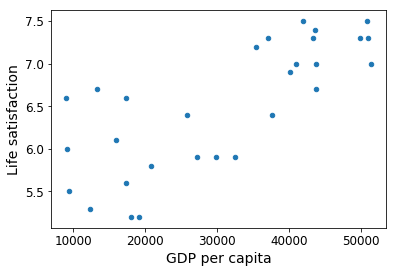

[[6.18445781]]


In [38]:
# Code example
import sklearn

# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2017.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_2016.csv",thousands=',',delimiter=',',
                             encoding='latin1', na_values="n/a")
gdp_per_capita = gdp_per_capita.dropna(subset=['GDP per capita'])

# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[cyprusGDP]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

In [39]:
oecd_bli, gdp_per_capita = backup

In [40]:
missing_data

,GDP per capita,Life satisfaction
Country,,
Brazil,8670.00,6.6
Mexico,9009.28,6.6
Chile,13340.91,6.7
Czech Republic,17256.92,6.6
Norway,74822.11,7.5
Switzerland,80675.31,7.5
Luxembourg,101994.09,6.9


In [41]:
position_text2 = {
    "Brazil": (1000, 9.0),
    "Mexico": (11000, 9.0),
    "Chile": (25000, 9.0),
    "Czech Republic": (35000, 9.0),
    "Norway": (60000, 3),
    "Switzerland": (72000, 3.0),
    "Luxembourg": (90000, 3.0),
}

Saving figure representative_training_data_scatterplot


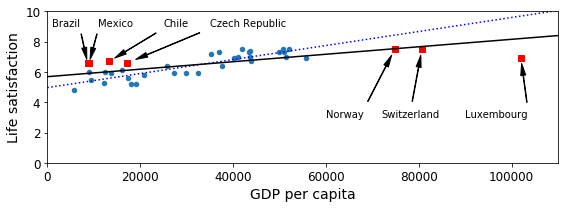

In [43]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 10])

for country, pos_text in position_text2.items():
    pos_data_x, pos_data_y = missing_data.loc[country]
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")

X=np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1*X, "b:")

lin_reg_full = sklearn.linear_model.LinearRegression()
Xfull = np.c_[full_country_stats["GDP per capita"]]
yfull = np.c_[full_country_stats["Life satisfaction"]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "k")

save_fig('representative_training_data_scatterplot')
plt.show()

/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:117: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)


Saving figure overfitting_model_plot


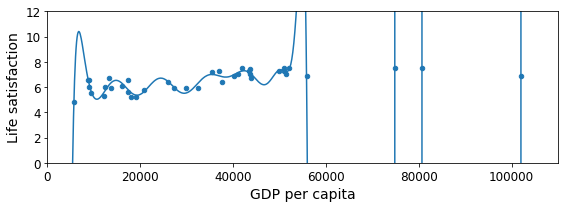

In [45]:
full_country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(8,3))
plt.axis([0, 110000, 0, 12])

from sklearn import preprocessing
from sklearn import pipeline

poly = preprocessing.PolynomialFeatures(degree=60, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = sklearn.linear_model.LinearRegression()

pipeline_reg = pipeline.Pipeline([('poly', poly), ('scal', scaler), ('lin', lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)
save_fig('overfitting_model_plot')
plt.show()

In [46]:
full_country_stats.loc[[c for c in full_country_stats.index if "W" in c.upper()]]["Life satisfaction"]

Country
New Zealand    7.3
Sweden         7.3
Norway         7.5
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [47]:
print(gdp_per_capita.index)

Index([                                                             'Afghanistan',
                                                                        'Albania',
                                                                        'Algeria',
                                                                         'Angola',
                                                            'Antigua and Barbuda',
                                                                      'Argentina',
                                                                        'Armenia',
                                                                      'Australia',
                                                                        'Austria',
                                                                     'Azerbaijan',
       ...
                                                                        'Uruguay',
                                                                     'Uzbeki

In [49]:
gdp_per_capita.index

Index([                                                             'Afghanistan',
                                                                        'Albania',
                                                                        'Algeria',
                                                                         'Angola',
                                                            'Antigua and Barbuda',
                                                                      'Argentina',
                                                                        'Armenia',
                                                                      'Australia',
                                                                        'Austria',
                                                                     'Azerbaijan',
       ...
                                                                        'Uruguay',
                                                                     'Uzbeki

In [48]:
gdp_per_capita.loc[[c for c in gdp_per_capita.index if "W" in c.upper()]].head()

AttributeError: 'float' object has no attribute 'upper'

Saving figure ridge_model_plot


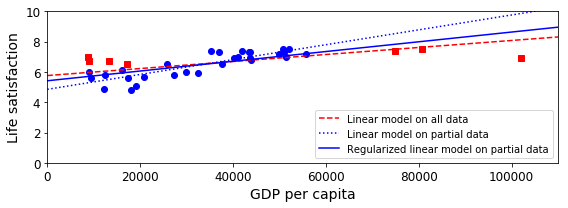

In [30]:
plt.figure(figsize=(8,3))

plt.xlabel("GDP per capita")
plt.ylabel('Life satisfaction')

plt.plot(list(sample_data["GDP per capita"]), list(sample_data["Life satisfaction"]), "bo")
plt.plot(list(missing_data["GDP per capita"]), list(missing_data["Life satisfaction"]), "rs")

X = np.linspace(0, 110000, 1000)
plt.plot(X, t0full + t1full * X, "r--", label="Linear model on all data")
plt.plot(X, t0 + t1*X, "b:", label="Linear model on partial data")

ridge = linear_model.Ridge(alpha=10**9.5)
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
ridge.fit(Xsample, ysample)
t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b", label="Regularized linear model on partial data")

plt.legend(loc="lower right")
plt.axis([0, 110000, 0, 10])
save_fig('ridge_model_plot')
plt.show()

In [31]:
backup = oecd_bli, gdp_per_capita

def prepare_country_stats(oecd_bli, gdp_per_capita):
    return sample_data

In [32]:
# Replace this linear model:
model = sklearn.linear_model.LinearRegression()

In [33]:
# with this k-neighbors regression model:
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

In [34]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = np.array([[22587.0]])  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.76666667]]

[[ 5.76666667]]
